In [23]:
import numpy as np
def f(x,t):
    res =  0          #задаем функцию правой части
    return res
sigma = 2
c = 5
x1 = 0
hi = 0.5
def Ttoch(t,x):       #задаем точное решение
    if (x1+c*t<=x):
        return(0)
    if (x<=x1+c*t):
        return ((c*sigma/hi)*(c*t+x1-x))**(1/sigma)

Nt =  100                     #задать кол-во узлов по t. Это кол-во отрезков (тк плюс еще нулевой узел будет!)
Nx =  100                          #задать кол-во узлов по x
t = np.linspace(0.1, 0.5, Nt+1)
x = np.linspace(0, 1, Nx+1)
k = np.zeros((Nt+1,Nx+1))       
Lx = x[Nx]-x[0]
Lt = t[Nt]-t[0]
def Txo(t):              #функция при х=0
    return (10*(t**(1/2)))            
def TNx(t):              #функция при х=1
    return (0)
def T0(x):                #функция при t=0.1 
    if ((0.3<=x)and(x<=1)):
        return(0)
    if ((0<=x)and(x<=0.3)):
        return (10*(1-2*x))**(1/2)
T = np.zeros((Nt+1, Nx+1))
hx = Lx/Nx
ht = Lt/Nt

In [24]:
#сама прогонка

for i in range(Nx):              
    T[0,i]=T0(x[i])
for n in range(Nt):              #фиксируем время
    T[n+1,0]=Txo(t[n+1])
    T[n+1,Nx]=TNx(t[n+1])
    for i in range(Nx+1):                    
        k[n+1,i]= hi*(T[n,i])**sigma
    ai= np.zeros(Nx-1)
    bi= np.zeros(Nx-1)    
    Ai = np.zeros(Nx-1)            #вычисление Ai Bi Ci Di
    Bi = np.zeros(Nx-1)
    Ci = np.zeros(Nx-1)
    Di = np.zeros(Nx-1)
    for j in range(Nx-1):
        i=j+1
        Ai[j]= -(k[n+1,i]+k[n+1,i-1])/(2*hx**2)
        Bi[j]= (2*k[n+1,i]+k[n+1,i+1]+k[n+1,i-1])/(2*hx**2)+1/ht
        Ci[j]= -(k[n+1,i]+k[n+1,i+1])/(2*hx**2)
        Di[j]= f(x[i],t[n+1])+T[n,i]/ht
    ai[0]= -Ci[0]/Bi[0]                     #вычисляем альфа и бетта - первые отдельно, и потом до Nx-1
    bi[0]= (Di[0]-Ai[0]*Txo(t[n+1]))/Bi[0]
    for j in range(Nx-2): 
        i=j+1
        ai[i]= -Ci[i]/(Ai[i]*ai[i-1]+Bi[i])
        bi[i]= (Di[i]-Ai[i]*bi[i-1])/(Ai[i]*ai[i-1]+Bi[i])

    for j in range(Nx-1):                   #обратной прогонкой находим Т = n+1ю строчку в матрице значений 
        i=Nx-1-j
        T[n+1,i]=ai[i-1]*T[n+1,i+1]+bi[i-1]

In [25]:
E=[[abs(Ttoch(t[n],x[i])-T[n,i]) for n in range(Nt+1)]for i in range(Nx+1) ]

print(max(max(E[i]) for i in range(m)))

2.0


In [26]:
2.0

2.0

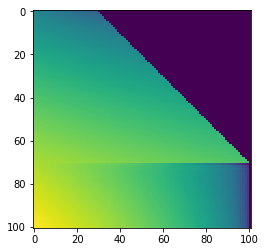

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(T)

In [28]:
import plotly.graph_objs as go
def Graph(TempTable):
    fig = go.Figure(data=[go.Surface(z=TempTable,colorscale="hot")])
    fig.update_layout(autosize=False,scene = dict(xaxis_title='x',yaxis_title='t',zaxis_title='T'),margin=dict(r=2, b=1, l=1, t=1),showlegend=False)
    fig.show()
Graph(T)

[[3.16227766 3.13049517 3.09838668 ... 0.         0.         0.        ]
 [3.2249031  3.19374388 3.16227766 ... 0.         0.         0.        ]
 [3.28633535 3.25576412 3.2249031  ... 0.         0.         0.        ]
 ...
 [7.01427117 7.         6.98569968 ... 5.4405882  5.42217668 5.40370243]
 [7.04272674 7.02851336 7.01427117 ... 5.47722558 5.45893763 5.4405882 ]
 [7.07106781 7.05691151 7.04272674 ... 5.5136195  5.49545267 5.47722558]]


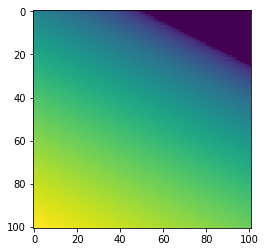

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
#H=[[Ttoch(t[n],x[i]) for n in range(Nt)]for i in range(Nx) ]

H = np.zeros((Nt+1, Nx+1))
for n in range(Nt+1):              
    for j in range(Nx+1):               
        H[n,j]=Ttoch(t[n],x[j])
        #print(t[n],' ',x[j],' ',H[n,j])
plt.imshow(H)
print(H)

In [30]:
import plotly.graph_objs as go
def Graph(TempTable):
    fig = go.Figure(data=[go.Surface(z=TempTable,colorscale="hot")])
    fig.update_layout(autosize=False,scene = dict(xaxis_title='x',yaxis_title='t',zaxis_title='H'),margin=dict(r=2, b=1, l=1, t=1),showlegend=False)
    fig.show()
Graph(H)

[[0.0, 0.0, 0.0, 0.0, 0.0, 4.440892098500626e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.440892098500626e-16, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 0.0, 8.881784197001252e-16, 8.881784197001252e-16, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 8.881784197001252e-16, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16,

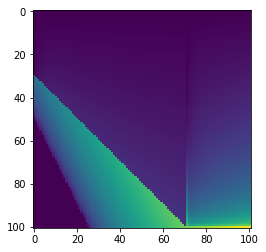

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
E=[[abs(H[n,i]-T[n,i]) for n in range(Nt+1)]for i in range(Nx+1)]
plt.imshow(E)
Est = np.zeros(Nt+1)
for j in range(Nt+1):
    for i in range(Nx+1):
        Est[j]=max(abs())
print(max(max(E)))

In [32]:
import plotly.graph_objs as go
def Graph(TempTable):
    fig = go.Figure(data=[go.Surface(z=TempTable,colorscale="hot")])
    fig.update_layout(autosize=False,scene = dict(xaxis_title='x',yaxis_title='t',zaxis_title='E'),margin=dict(r=2, b=1, l=1, t=1),showlegend=False)
    fig.show()
Graph(E)